In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
athletes = pd.read_excel(r'I:\Deep Learning data\2021 Olempics data visualization\Athletes.xlsx')
gender   = pd.read_excel(r'I:\Deep Learning data\2021 Olempics data visualization\EntriesGender.xlsx')
medals   = pd.read_excel(r'I:\Deep Learning data\2021 Olempics data visualization\Medals.xlsx')
teams    = pd.read_excel(r'I:\Deep Learning data\2021 Olempics data visualization\Teams.xlsx')


In [6]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [9]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB


In [10]:
athletes.isnull().sum()

Name          0
NOC           0
Discipline    0
dtype: int64

In [7]:
gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [11]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Discipline  46 non-null     object
 1   Female      46 non-null     int64 
 2   Male        46 non-null     int64 
 3   Total       46 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


In [12]:
gender.isnull().sum()

Discipline    0
Female        0
Male          0
Total         0
dtype: int64

In [8]:
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [13]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [15]:
medals.isnull().sum()

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

In [16]:
athletes['NOC'].value_counts()

United States of America       615
Japan                          586
Australia                      470
People's Republic of China     401
Germany                        400
                              ... 
United Republic of Tanzania      2
Saint Kitts and Nevis            2
Marshall Islands                 2
Vanuatu                          2
South Sudan                      2
Name: NOC, Length: 206, dtype: int64

In [22]:
athletes.duplicated().sum()

1

In [27]:
athletes.drop_duplicates(subset=None, keep='first', inplace=True)


In [28]:
athletes.shape

(11084, 3)

In [26]:
athletes['NOC'].nunique()

206

In [38]:
fig = px.bar(athletes,x= 'NOC',title = 'Number of Athletes from Countries', color='NOC')
fig.show()

In [45]:
athletes_country = athletes.groupby('NOC').count().reset_index()
athletes_country

,NOC,Name,Discipline
0,Afghanistan,5,5
1,Albania,8,8
2,Algeria,41,41
3,American Samoa,5,5
4,Andorra,2,2
...,...,...,...
201,"Virgin Islands, British",3,3
202,"Virgin Islands, US",4,4
203,Yemen,3,3
204,Zambia,29,29


In [137]:
athletes_country = athletes.groupby(['NOC', 'Discipline']).count()
athletes_country.reset_index(inplace=True)
fig = px.treemap(athletes_country, path=[px.Constant("all"), 'NOC', 'Discipline'], values='Name')
fig.show()

In [139]:
athletes_discipline = athletes.groupby(['Discipline','NOC']).count()
athletes_discipline.reset_index(inplace=True)
fig = px.treemap(athletes_discipline, path=[px.Constant("all"),'Discipline', 'NOC'], values='Name')
fig.show()


In [140]:
sport = 'Diving'
fig = px.treemap(athletes_discipline[athletes_discipline['Discipline'] == sport], path=[px.Constant("all"),'Discipline', 'NOC'], values='Name')
fig.show()

In [141]:
sport = 'Football'
fig = px.treemap(athletes_discipline[athletes_discipline['Discipline'] == sport], path=[px.Constant("all"),'Discipline', 'NOC'], values='Name')
fig.show()

In [50]:
athletes_country = athletes_country.sort_values('Discipline', ascending = False)
country_top = athletes_country.head(30)

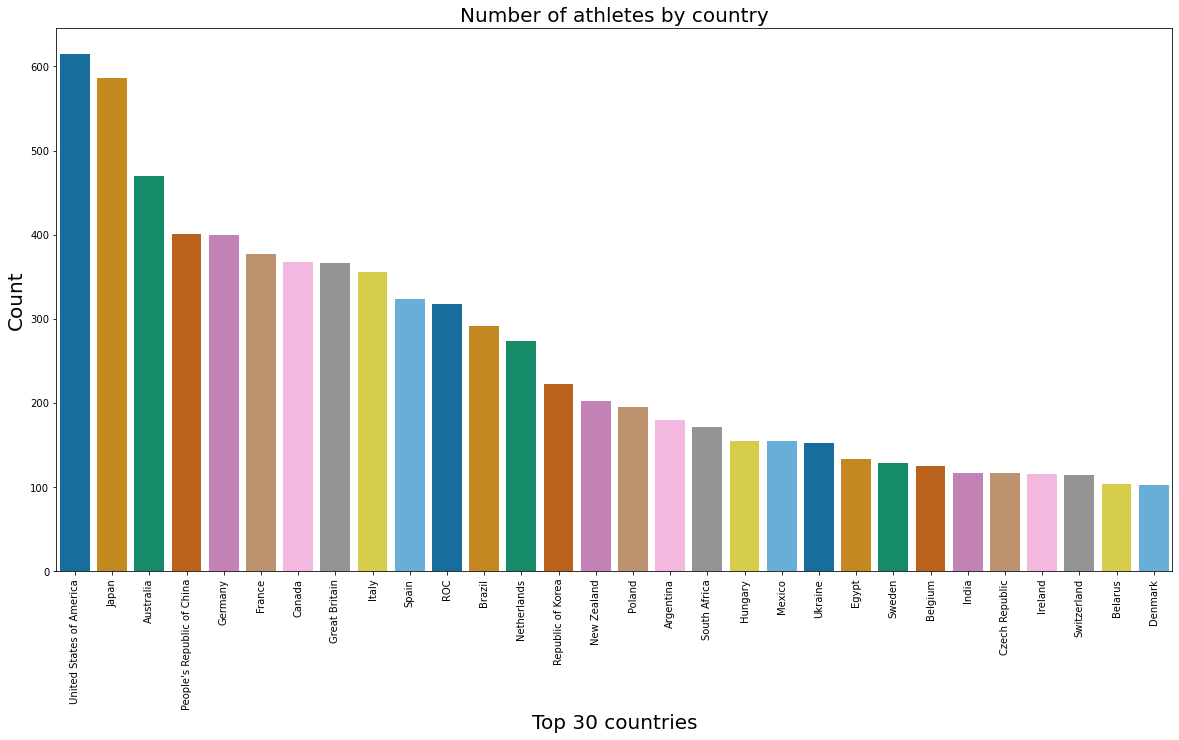

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(x=country_top['NOC'], 
            y=country_top['Discipline'], 
            linewidth = 2,
            palette = sns.color_palette("colorblind", 
            n_colors=30))
plt.xticks(rotation = 90)
plt.xlabel('Top 30 countries', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Number of athletes by country', fontsize = 20)
plt.show()

# Let us Explore the Gender Dataset

In [53]:
gender.duplicated().sum()

0

In [56]:
gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


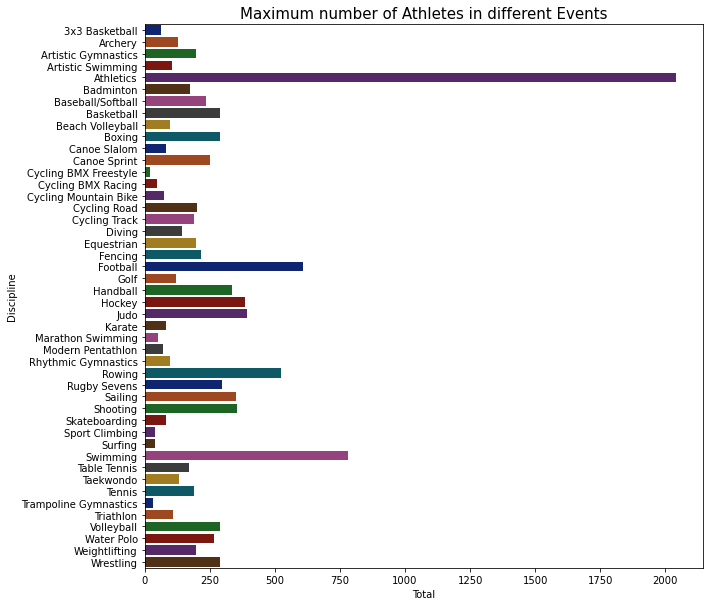

In [59]:
plt.figure(figsize=(10,10))
sns.barplot(x='Total',y='Discipline', data=gender
            ,palette = sns.color_palette("dark", 
            n_colors=30),linewidth = 2)
plt.title('Maximum number of Athletes in different Events', fontsize = 15)
plt.show()

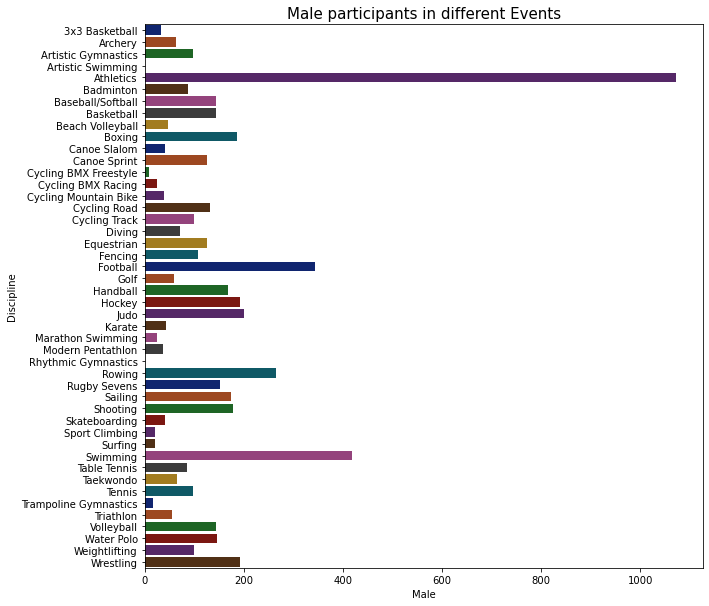

In [61]:
plt.figure(figsize=(10,10))
sns.barplot(x='Male',y='Discipline', data=gender
            ,palette = sns.color_palette("dark", 
            n_colors=30),linewidth = 2)
plt.title('Male participants in different Events', fontsize = 15)
plt.show()

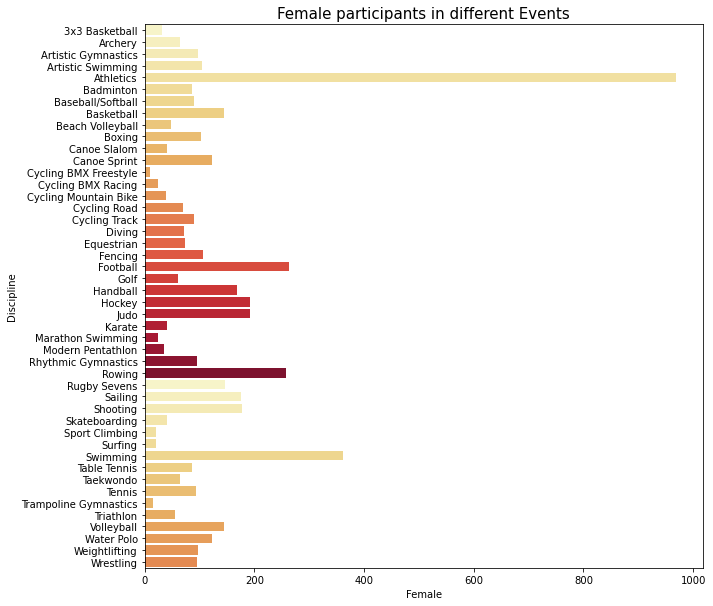

In [65]:
plt.figure(figsize=(10,10))
sns.barplot(x='Female',y='Discipline', data=gender
            ,palette = sns.color_palette("YlOrRd", 
            n_colors=30),linewidth = 2)
plt.title('Female participants in different Events', fontsize = 15)
plt.show()

In [77]:
male_participantions = gender.Male.sum()
male_participantions

5884

In [78]:
female = gender.Female.sum()
female

5432

In [135]:
fig = px.pie(gender, values='Male', names='Discipline',color='Discipline',
             title='Total number of Male athletes in each discipline',
             hover_data=['Discipline'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [133]:
fig = px.pie(gender, values='Female', names='Discipline',
             title='Total number of female athletes in each discipline',
             hover_data=['Discipline'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [134]:
gender['Difference']=gender['Male']-gender['Female']
gender.head(10)

,Discipline,Female,Male,Total,Difference
4,Athletics,969,1072,2041,103
36,Swimming,361,418,779,57
20,Football,264,344,608,80
29,Rowing,257,265,522,8
24,Judo,192,201,393,9
23,Hockey,192,192,384,0
32,Shooting,178,178,356,0
31,Sailing,175,175,350,0
22,Handball,168,168,336,0
30,Rugby Sevens,146,151,297,5


In [136]:
fig = px.pie(gender, values='Difference', names='Discipline',
             title='(Male-Female) Athletes in each discipline',
             hover_data=['Discipline'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

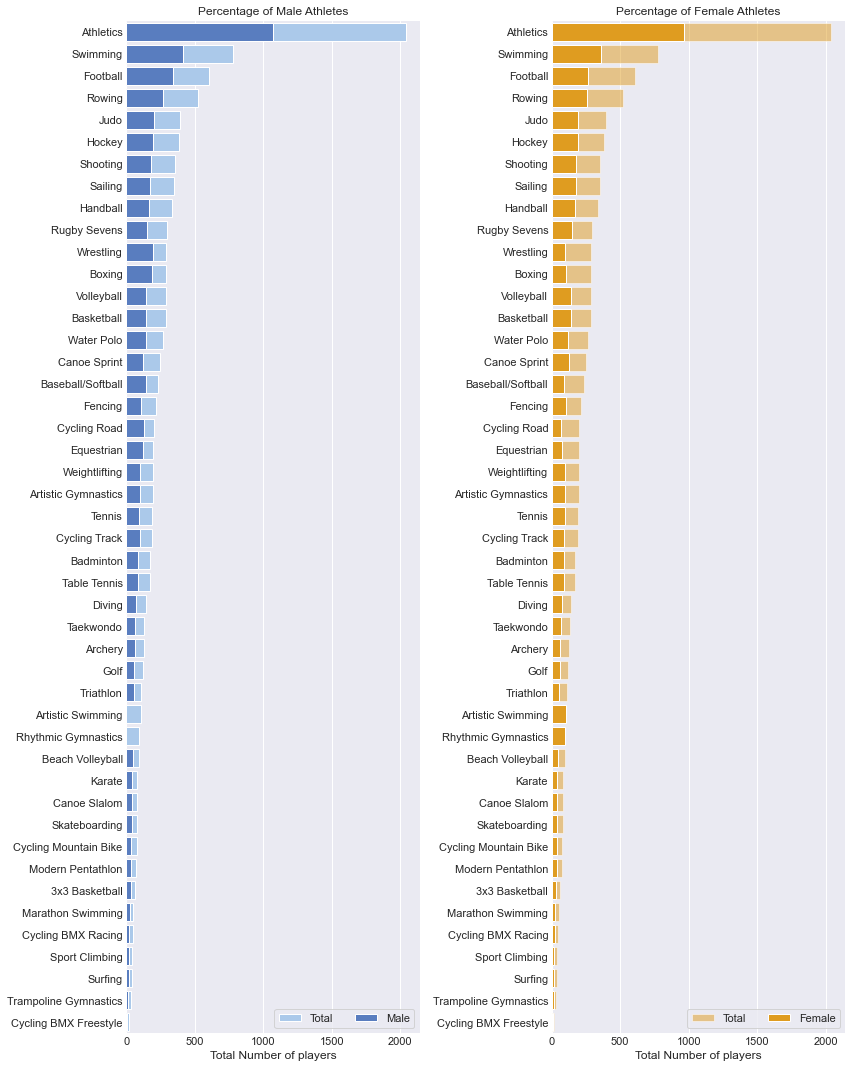

In [128]:
f, ax = plt.subplots(1 , 2 ,figsize=(12, 15))
gender = gender.sort_values(by = 'Total' , ascending = False)

sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Discipline", data=gender,
            label="Total", color="b" , ax = ax[0])

sns.set_color_codes("muted")
sns.barplot(x="Male", y="Discipline", data=gender,
            label="Male", color="b" , ax = ax[0])


ax[0].legend(ncol=2, loc="lower right", frameon=True)
ax[0].set( ylabel="",xlabel="Total Number of players" , title = "Percentage of Male Athletes")
sns.despine(left=True, bottom=True)


sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Discipline", data=gender,
            label="Total", color="orange"  , alpha = 0.5,ax = ax[1])

sns.set_color_codes("muted")
sns.barplot(x="Female", y="Discipline", data=gender,
            label="Female", color="orange" , ax = ax[1])

ax[1].legend(ncol=2, loc="lower right", frameon=True)
ax[1].set( ylabel="",xlabel="Total Number of players" , title = "Percentage of Female Athletes")
sns.despine(left=True, bottom=True)

plt.tight_layout()

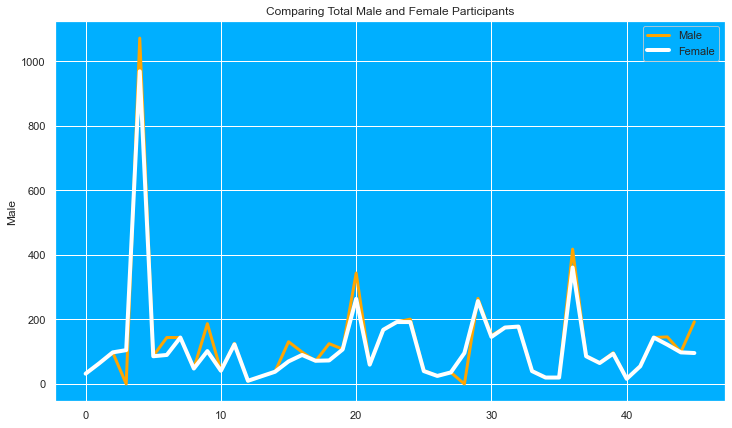

In [72]:
plt.figure(figsize=(12,7))
sns.set(rc = {'axes.facecolor': '#00afff', 'axes.grid': True,})
sns.lineplot(data = gender['Male'],linewidth = 3
             ,label = 'Male', color = 'orange')
sns.lineplot(data = gender['Female'], linewidth = 4
             ,label = 'Female', color = 'white')
plt.title('Comparing Total Male and Female Participants')
plt.show()

# Now the Medals Dataset

In [79]:
medals.head(10)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


In [90]:
medals.loc[medals['Team/NOC'] == 'Japan']

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
2,3,Japan,27,14,17,58,5


In [92]:
country_top = medals.head(50)
country_top

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


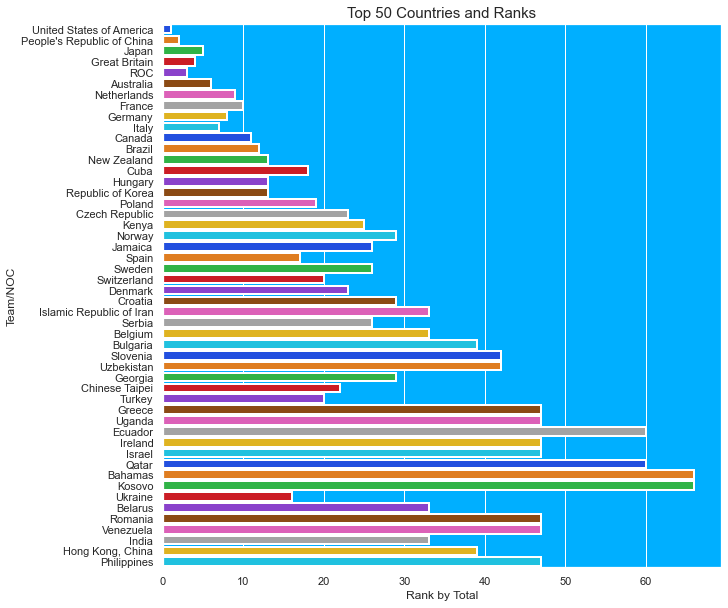

In [98]:
plt.figure(figsize=(10,10))
sns.barplot(x='Rank by Total',y='Team/NOC', data=country_top,
            palette = sns.color_palette("bright", 
            n_colors=30), linewidth = 2)
plt.title('Top 50 Countries and Ranks', fontsize = 15)
plt.show()

In [99]:
medals.drop(columns = 'Rank',inplace=True)


In [100]:
medals.head()

,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3


In [101]:
medals_Top = medals.head(30)
medals_Top

,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
5,Australia,17,7,22,46,6
6,Netherlands,10,12,14,36,9
7,France,10,12,11,33,10
8,Germany,10,11,16,37,8
9,Italy,10,10,20,40,7


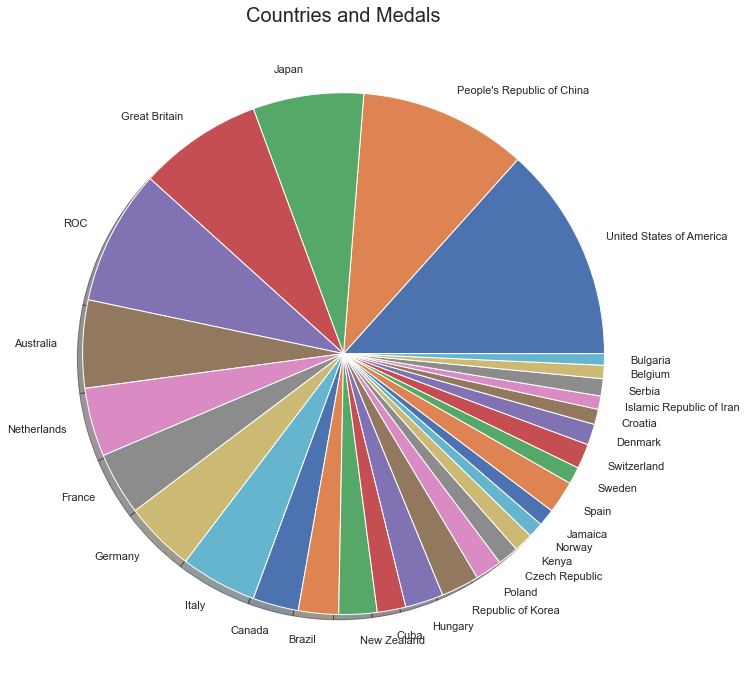

In [104]:
plt.figure(figsize=[12,12])
plt.pie(medals_Top['Total'], labels = medals_Top['Team/NOC'],shadow = True, )
plt.title('Countries and Medals', fontsize = 20)
plt.show()

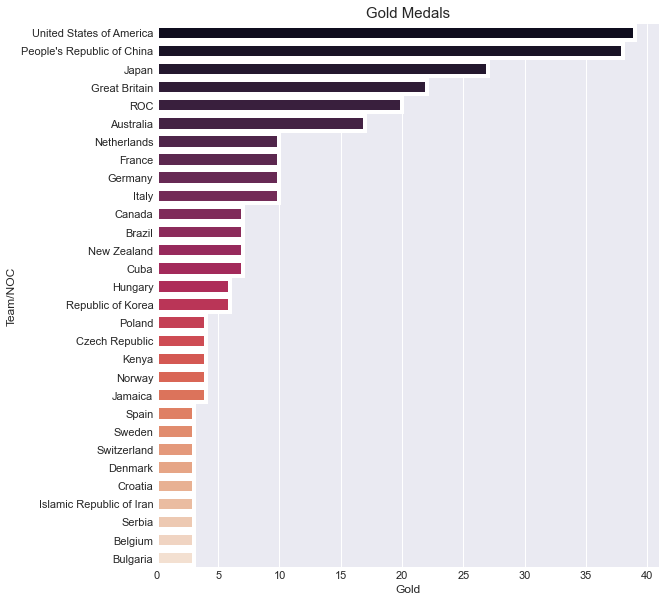

In [108]:
plt.figure(figsize=(9,10))
plt.style.use('seaborn-darkgrid')
sns.barplot(x='Gold',y='Team/NOC',data=medals_Top, 
            palette = sns.color_palette("rocket", 
            n_colors=30),
           linewidth = 4)
plt.title('Gold Medals', fontsize = 15)
plt.show()

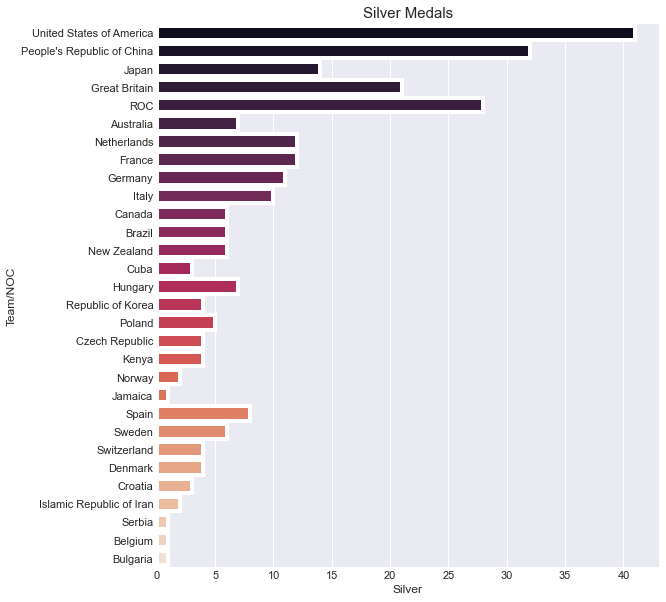

In [109]:
plt.figure(figsize=(9,10))
plt.style.use('seaborn-darkgrid')
sns.barplot(x='Silver',y='Team/NOC',data=medals_Top, 
            palette = sns.color_palette("rocket", 
            n_colors=30),
           linewidth = 4)
plt.title('Silver Medals', fontsize = 15)
plt.show()

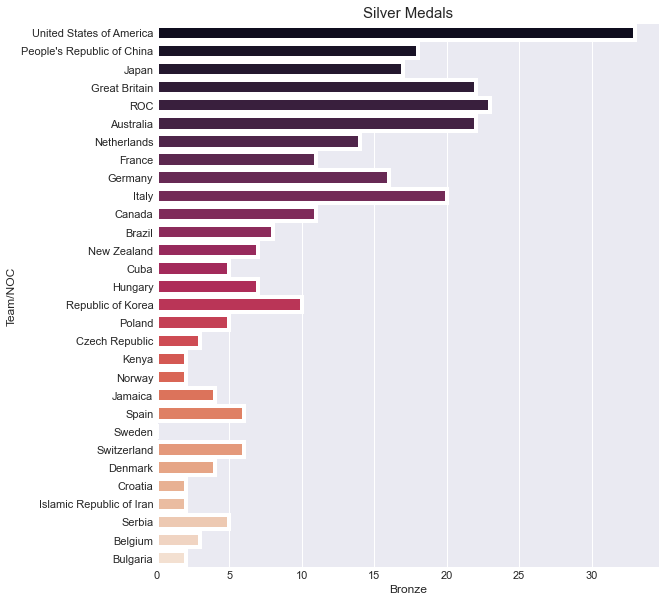

In [110]:
plt.figure(figsize=(9,10))
plt.style.use('seaborn-darkgrid')
sns.barplot(x='Bronze',y='Team/NOC',data=medals_Top, 
            palette = sns.color_palette("rocket", 
            n_colors=30),
           linewidth = 4)
plt.title('Silver Medals', fontsize = 15)
plt.show()

In [113]:
fig = px.pie(medals_Top, values='Gold', names='Team/NOC')
fig.show()


In [115]:
fig = px.pie(medals_Top, values='Silver', names='Team/NOC')
fig.show()

In [116]:
fig = px.pie(medals_Top, values='Bronze', names='Team/NOC')
fig.show()

In [120]:
fig = px.pie(medals_Top, values='Total', names='Team/NOC')
fig.show()